In [106]:
# Import all necessary libraries
import pandas as pd #for analyzing data
import numpy as np #mathmetical operation
from sklearn.impute import SimpleImputer # for fill na
import missingno as msno #for plotting missing data in columns
from scipy import stats #for statisticalanalysis
import statsmodels.api as sm #for statistical model
import plotly.graph_objects as go #for plotting graph
from plotly.subplots import make_subplots 
import matplotlib.pyplot as plt #visualization and graphical plotting
import seaborn as sns #for plotting heatmap
from natsort import index_natsorted #for shorting index.
from sklearn.preprocessing import Binarizer # for binarizing data

from sklearn.model_selection import train_test_split # split data into train data set and test data set

#data scalling and preprocessing
from sklearn import preprocessing #for preprocessing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler # for standarisation data

#feature Selection
from sklearn.decomposition import PCA #for principal component analysis
from sklearn.feature_selection import SelectKBest #selecting best features
from sklearn.feature_selection import chi2 #chi squre test
from sklearn.ensemble import ExtraTreesClassifier 
from statsmodels.stats.outliers_influence import variance_inflation_factor #for calculating vif

#modeling
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.svm import SVC #Support vector mechine
from sklearn.neighbors import KNeighborsClassifier #K_neighbors classifier
from sklearn.naive_bayes import GaussianNB #Gaussian Naive_bayes

#performace estimation
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#cross validation for
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report #classification report
from sklearn.metrics import roc_curve, roc_auc_score# AUC score and ROC curve


# Import data and understand data

In [107]:
df=pd.read_csv("/content/Hasnur Jahan - Total_data.csv") #read the dataset

In [108]:
df #showing the dataset

Unnamed: 0      id  parity  logit  ...    wg2        BMI  lda  childwt
0            42  101007       3      1  ...   6.35  17.666667    1      3.4
1            27  101008       4      1  ... -45.00  19.477147    1      3.5
2           158  101009       1      1  ...   4.50  19.111111    1      3.0
3           156  101010       1      1  ...   7.00  18.261505    1      3.0
4           155  101013       1      1  ...   3.50  24.560326    1      3.0
..          ...     ...     ...    ...  ...    ...        ...  ...      ...
661         257  211029       3      1  ...   3.50  19.107495    1      2.7
662         509  211037       1      1  ...   4.60  18.422594    1      3.3
663         539  211040       1      1  ...   5.50  17.709563    1      2.9
664         171  211042       2      1  ...  -0.50  26.159334    1      2.9
665         111  261003       2      1  ...   3.50  18.017206    1      3.0

[666 rows x 75 columns]

In [109]:
#showing the dataset columns name
for col in df.columns: 
    print(col)

Unnamed: 0
id
parity
logit
mage
mwt
mht
mdarm
head
relg
habit
occup
educ
workload
f11
f21
f31
f41
anemia
asthma
wm18
ageyc
boh
ecostat
mwt2
belly1
fand1
sis1
dis1
inject
falif
iron
worklo
f12
f22
f32
f42
rest
conv1
d21
bleed1
blddef1
asthma2
fever1
lomot1
contab1
db1
mwt3
belly2
fand2
sis2
dia2
inject2
falif2
iron2
workl
f13
f23
f33
f43
rest1
conv2
d
bleed
blddef
asthm
fever
lomot
contab
db
wg1
wg2
BMI
lda
childwt


In [110]:
#description of the dataset
df.describe()

Unnamed: 0             id  ...         lda     childwt
count  666.000000     666.000000  ...  666.000000  666.000000
mean   333.500000  154470.540541  ...    0.513514    2.703116
std    192.401923   50571.781097  ...    0.858726    0.461223
min      1.000000  101007.000000  ...   -1.000000    0.500000
25%    167.250000  106066.500000  ...    1.000000    2.500000
50%    333.500000  108055.500000  ...    1.000000    2.700000
75%    499.750000  205052.500000  ...    1.000000    3.000000
max    666.000000  261003.000000  ...    1.000000    4.800000

[8 rows x 75 columns]

In [111]:
#information of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  666 non-null    int64  
 1   id          666 non-null    int64  
 2   parity      666 non-null    int64  
 3   logit       666 non-null    int64  
 4   mage        666 non-null    float64
 5   mwt         666 non-null    float64
 6   mht         666 non-null    float64
 7   mdarm       666 non-null    float64
 8   head        666 non-null    float64
 9   relg        666 non-null    int64  
 10  habit       666 non-null    int64  
 11  occup       666 non-null    int64  
 12  educ        666 non-null    int64  
 13  workload    666 non-null    int64  
 14  f11         666 non-null    int64  
 15  f21         665 non-null    float64
 16  f31         665 non-null    float64
 17  f41         665 non-null    float64
 18  anemia      666 non-null    int64  
 19  asthma      666 non-null    i

The dataset have 666 row with 75 columns. The data set's main objective is to find out birth wieght of babies early from different factors of mother during pregnency.<br>
In the data set there have childwt. which is our target column or dependent column and all other columns are independent column. The independent columns are like mothers physical stuation, environmental fector, habit, desease and many more. <br>On basis of mothers that type of condition we will predict the chil's birth weight.

# Data Cleaning

In [112]:
#showing the sum of the null data in the data column
df.isnull().sum().head(30)

Unnamed: 0      0
id              0
parity          0
logit           0
mage            0
mwt             0
mht             0
mdarm           0
head            0
relg            0
habit           0
occup           0
educ            0
workload        0
f11             0
f21             1
f31             1
f41             1
anemia          0
asthma          0
wm18            2
ageyc         246
boh           258
ecostat         0
mwt2           52
belly1         53
fand1          54
sis1           53
dis1           53
inject         54
dtype: int64

In [113]:
#visualize the null column
msno.bar(df)

In [114]:
# shape of the dataset
df.shape

(666, 75)

In [115]:
null_cols = (df.isnull().sum() / len(df)).sort_values(ascending=False)[:20]
null_cols

wg1        0.475976
boh        0.387387
ageyc      0.369369
BMI        0.174174
inject2    0.166667
lomot      0.103604
db         0.100601
asthm      0.099099
d          0.099099
dia2       0.097598
sis2       0.097598
falif      0.097598
blddef     0.097598
fand2      0.096096
workl      0.096096
belly2     0.096096
mwt3       0.096096
falif2     0.096096
iron2      0.096096
f13        0.096096
dtype: float64

In [116]:
null_cols = null_cols[null_cols > 0.2].index
null_cols

Index(['wg1', 'boh', 'ageyc'], dtype='object')

In [117]:
# drop the column from the dataset which have most null value
df=df.drop(columns=['wg1', 'boh', 'ageyc'])

In [118]:
# drop the irrelavent column from the dataset
cols=[0,1]
data=df.drop(df.columns[cols], axis=1)

In [119]:
#fill the null data with most frequesnt data in the column
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data=(pd.DataFrame(imp.fit_transform(data),
                   columns=data.columns,
                   index=data.index))

In [120]:
#after filling the data see there have no null value in any column
data.isnull().sum()

parity     0
logit      0
mage       0
mwt        0
mht        0
          ..
db         0
wg2        0
BMI        0
lda        0
childwt    0
Length: 70, dtype: int64

In [121]:
#drop duplicate value if there have any
data=data.drop_duplicates()

In [122]:
#after cleaning the dataset
data

parity  logit   mage    mwt   mht  ...   db    wg2        BMI  lda  childwt
0       3.0    1.0  26.83  39.75  1.50  ...  0.0   6.35  17.666667  1.0      3.4
1       4.0    1.0  17.92  45.00  1.52  ...  1.0 -45.00  19.477147  1.0      3.5
2       1.0    1.0  35.00  43.00  1.50  ...  0.0   4.50  19.111111  1.0      3.0
3       1.0    1.0  26.00  40.00  1.48  ...  1.0   7.00  18.261505  1.0      3.0
4       1.0    1.0  25.00  56.00  1.51  ...  1.0   3.50  24.560326  1.0      3.0
..      ...    ...    ...    ...   ...  ...  ...    ...        ...  ...      ...
661     3.0    1.0  20.83  46.50  1.56  ...  1.0   3.50  19.107495  1.0      2.7
662     1.0    1.0  17.83  40.90  1.49  ...  0.0   4.60  18.422594  1.0      3.3
663     1.0    1.0  18.00  42.00  1.54  ...  1.0   5.50  17.709563  1.0      2.9
664     2.0    1.0  23.00  55.00  1.45  ...  1.0  -0.50  26.159334  1.0      2.9
665     2.0    1.0  25.75  40.00  1.49  ...  0.0   3.50  18.017206  1.0      3.0

[666 rows x 70 columns]

In [123]:
data.shape

(666, 70)

In [124]:
bin=Binarizer(threshold=2.4)
col=data['childwt'].values
col=col.reshape(-1,1)
data['childwt']
bin.fit_transform(col)
data['childwt']=bin.fit_transform(col)

In [125]:
data.head(30)

parity  logit   mage    mwt   mht  ...   db    wg2        BMI  lda  childwt
0      3.0    1.0  26.83  39.75  1.50  ...  0.0   6.35  17.666667  1.0      1.0
1      4.0    1.0  17.92  45.00  1.52  ...  1.0 -45.00  19.477147  1.0      1.0
2      1.0    1.0  35.00  43.00  1.50  ...  0.0   4.50  19.111111  1.0      1.0
3      1.0    1.0  26.00  40.00  1.48  ...  1.0   7.00  18.261505  1.0      1.0
4      1.0    1.0  25.00  56.00  1.51  ...  1.0   3.50  24.560326  1.0      1.0
5      1.0    1.0  22.83  55.00  1.55  ...  1.0   3.70  22.892820  1.0      1.0
6      1.0    0.0  24.00  51.00  1.52  ...  1.0   4.00  22.074100 -1.0      0.0
7      5.0    1.0  28.00  59.00  1.53  ...  1.0   4.00  25.203981  1.0      1.0
8      5.0    1.0  20.00  41.00  1.44  ...  1.0   4.00  19.772377  1.0      1.0
9      2.0    1.0  29.83  40.80  1.48  ...  1.0   3.20  18.626735  1.0      1.0
10     1.0    0.0  20.00  39.00  1.55  ...  1.0   2.50  16.233091 -1.0      0.0
11     5.0    0.0  22.00  39.00  1.54  ...  1.0 -39.00  19.024970 -1.0      0.0
12     1.0    1.0  28.00  35.50  1.42  ...  1.0 -35.50  17.605634  1.0      1.0
13     2.0    1.0  21.83  47.00  1.53  ...  1.0   4.50  20.077748  1.0      1.0
14     3.0    1.0  20.83  37.50  1.48  ...  0.0   5.00  17.120161  1.0      1.0
15     3.0    1.0  21.83  40.10  1.54  ...  1.0   5.90  16.908416  1.0      1.0
16     4.0    1.0  25.75  47.00  1.46  ...  1.0   1.50  22.049165  1.0      1.0
17     3.0    0.0  30.00  40.00  1.44  ...  1.0   8.00  19.024970 -1.0      0.0
18     1.0    0.0  22.83  38.00  1.50  ...  1.0   4.00  16.888889 -1.0      0.0
19     3.0    1.0  19.75  35.00  1.50  ...  0.0   3.50  15.555556  1.0      1.0
20     5.0    1.0  25.00  45.00  1.43  ...  1.0   1.00  22.005966  1.0      1.0
21     3.0    1.0  28.00  36.00  1.49  ...  0.0   3.00  16.215486  1.0      1.0
22     6.0    1.0  24.75  39.00  1.48  ...  1.0   5.00  17.804967  1.0      1.0
23     1.0    0.0  20.00  43.00  1.48  ...  1.0   3.00  19.631118 -1.0      0.0
24     1.0    1.0  20.00  41.00  1.49  ...  1.0   4.00  18.467637  1.0      1.0
25     3.0    1.0  18.83  42.40  1.48  ...  1.0   2.50  19.357195  1.0      1.0
26     1.0    0.0  19.00  38.50  1.44  ...  1.0   2.50  18.566744 -1.0      0.0
27     1.0    1.0  22.75  45.50  1.52  ...  1.0   1.40  19.693560  1.0      1.0
28     2.0    1.0  19.75  40.00  1.51  ...  1.0   4.50  17.543090  1.0      1.0
29     1.0    1.0  19.00  47.00  1.51  ...  1.0  -1.00  20.613131  1.0      1.0

[30 rows x 70 columns]

There in the data logit column indicate <br>
0= child weight less than 2.5kg and<br>
1= child weight greater than 2.5kg <br>

With binariztion I have make child weight categorical. where I have defined<br>
0= child weight 0-2.4(weight less then 2.5 kg) and<br>
1= child weight 2.5-above(weight greater then 2.5 kg) <br>
As, both column are same we can drop one.

In [126]:
# drop column from the dataset
data=data.drop(columns=['logit'])

# Data exploration(Historical analysis report)

In [127]:
cols = data.columns
num_cols = data._get_numeric_data().columns
num_cols

Index(['parity', 'mage', 'mwt', 'mht', 'mdarm', 'head', 'relg', 'habit',
       'occup', 'educ', 'workload', 'f11', 'f21', 'f31', 'f41', 'anemia',
       'asthma', 'wm18', 'ecostat', 'mwt2', 'belly1', 'fand1', 'sis1', 'dis1',
       'inject', 'falif', 'iron', 'worklo', 'f12', 'f22', 'f32', 'f42', 'rest',
       'conv1', 'd21', 'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1',
       'contab1', 'db1', 'mwt3', 'belly2', 'fand2', 'sis2', 'dia2', 'inject2',
       'falif2', 'iron2', 'workl', 'f13', 'f23', 'f33', 'f43', 'rest1',
       'conv2', 'd', 'bleed', 'blddef', 'asthm', 'fever', 'lomot', 'contab',
       'db', 'wg2', 'BMI', 'lda', 'childwt'],
      dtype='object')

In [128]:
categorical_cols=data[['relg', 'habit', 'occup', 'educ', 'workload', 'f11', 'f21', 'f31',
       'f41', 'anemia', 'asthma', 'ecostat', 'inject', 'iron', 'worklo', 'f12', 'f22',
       'f32', 'f42', 'rest', 'conv1', 'd21', 'bleed1', 'blddef1', 'asthma2',
       'fever1', 'lomot1', 'contab1', 'db1', 'inject2', 'iron2', 'workl', 'f13', 'f23', 'f33',
       'f43', 'rest1', 'conv2', 'd', 'bleed', 'blddef', 'asthm', 'fever',
       'lomot', 'contab', 'db', 'lda','childwt']]

categorical_cols

relg  habit  occup  educ  workload  ...  lomot  contab   db  lda  childwt
0     1.0    0.0    0.0   0.0       1.0  ...    0.0     0.0  0.0  1.0      1.0
1     1.0    0.0    0.0   0.0       1.0  ...    0.0     0.0  1.0  1.0      1.0
2     0.0    1.0    1.0   1.0       1.0  ...    0.0     0.0  0.0  1.0      1.0
3     1.0    0.0    1.0   0.0       1.0  ...    0.0     0.0  1.0  1.0      1.0
4     1.0    0.0    1.0   0.0       1.0  ...    0.0     0.0  1.0  1.0      1.0
..    ...    ...    ...   ...       ...  ...    ...     ...  ...  ...      ...
661   1.0    0.0    0.0   0.0       1.0  ...    0.0     0.0  1.0  1.0      1.0
662   1.0    1.0    0.0   1.0       1.0  ...    0.0     0.0  0.0  1.0      1.0
663   0.0    0.0    0.0   0.0       1.0  ...    0.0     0.0  1.0  1.0      1.0
664   0.0    0.0    0.0   0.0       1.0  ...    0.0     0.0  1.0  1.0      1.0
665   1.0    0.0    0.0   0.0       1.0  ...    0.0     0.0  0.0  1.0      1.0

[666 rows x 48 columns]

Description of some categorical column:
relg=religious<br>
habit=having bad habit or not<br>
occup=having any occupation or not<br>
educ= educated or not educated<br>
workload=taking rest or having workload at different stages of pregnancy<br>
f11=Number of times protein taken in a week during 12 weeks of pregnancy<br>
f21=Number of times protein taken in a week <br>
f31=Number of times protein taken in a week <br>
f41=Number of times protein taken in a week <br>
anemia=anemia having or not<br>
asthma=asthma having or not<br>
ecostat=economic status<br>
inject=whether taken the injection or not<br>
iron=whether taken the iron tonic or not<br>
worklo=taking rest or having workload at different stages of pregnancy<br>
f12=Number of times protein taken in a week <br>
f22=Number of times protein taken in a week <br>
f32=Number of times protein taken in a week <br>
f42=Number of times protein taken in a week <br>
rest=having rest or not<br>
conv1= having convulsion or not<br>
bleed1=having bleeding or not<br>
blddef1=having bleeding or not<br>
asthma2=asthma having or not<br>
fever1=having fever or not<br>
inject2=whether taken the injection or not<br>
iron2=whether taken the iron tonic or not<br>
workl=taking rest or having workload at different stages of pregnancy<br>
f13= Number of times protein consumed by mother in a week at 28th week of pregnancy<br>
f23= Number of times protein consumed by mother in a weeek<br>
f33= Number of times protein consumed by mother in a week<br>
f43= Number of times protein consumed by mother in a week<br>
rest1=having rest or not<br>
conv2= having convulsion or not<br>
bleed=having bleeding or not<br>
blddef=having bleeding or not<br>
asthm=having asthm or not<br>
fever=having fever or not<br>
lda=column not required<br>
childwt= child wight<br>

In [129]:
continious_cols=data.drop(columns=['relg', 'habit', 'occup', 'educ', 'workload', 'f11', 'f21', 'f31',
       'f41', 'anemia', 'asthma', 'ecostat', 'inject', 'iron', 'worklo', 'f12', 'f22',
       'f32', 'f42', 'rest', 'conv1', 'd21', 'bleed1', 'blddef1', 'asthma2',
       'fever1', 'lomot1', 'contab1', 'db1', 'inject2', 'iron2', 'workl', 'f13', 'f23', 'f33',
       'f43', 'rest1', 'conv2', 'd', 'bleed', 'blddef', 'asthm', 'fever',
       'lomot', 'contab', 'db', 'lda','childwt'])
continious_cols

parity   mage    mwt   mht  mdarm  ...   sis2  dia2  falif2    wg2        BMI
0       3.0  26.83  39.75  1.50   20.0  ...  100.0  80.0    30.0   6.35  17.666667
1       4.0  17.92  45.00  1.52   22.0  ...  110.0  70.0    50.0 -45.00  19.477147
2       1.0  35.00  43.00  1.50   20.0  ...   90.0  50.0    15.0   4.50  19.111111
3       1.0  26.00  40.00  1.48   21.0  ...  102.0  52.0    50.0   7.00  18.261505
4       1.0  25.00  56.00  1.51   28.0  ...   98.0  62.0    30.0   3.50  24.560326
..      ...    ...    ...   ...    ...  ...    ...   ...     ...    ...        ...
661     3.0  20.83  46.50  1.56   20.5  ...  110.0  60.0     6.0   3.50  19.107495
662     1.0  17.83  40.90  1.49   22.0  ...   92.0  68.0     1.0   4.60  18.422594
663     1.0  18.00  42.00  1.54   22.0  ...   70.0   2.0    75.0   5.50  17.709563
664     2.0  23.00  55.00  1.45   27.0  ...   84.0  54.0   105.0  -0.50  26.159334
665     2.0  25.75  40.00  1.49   21.5  ...  118.0  80.0    20.0   3.50  18.017206

[666 rows x 21 columns]

In [130]:
num_cols = continious_cols._get_numeric_data().columns
num_cols

Index(['parity', 'mage', 'mwt', 'mht', 'mdarm', 'head', 'wm18', 'mwt2',
       'belly1', 'fand1', 'sis1', 'dis1', 'falif', 'mwt3', 'belly2', 'fand2',
       'sis2', 'dia2', 'falif2', 'wg2', 'BMI'],
      dtype='object')

Here, from the histogram we can see the distribution of data columns. 
here, description of somedata columns are <br>
parity= order of gravida<br>
mage= mother's age <br>
mwt=mother's weight at 12 week <br>
mht= mother's height <br>
mdarm=mid arm circumference<br>
head=head circumference<br>
wm18= noof adult women(above 18)in family<br>
mwt2=mother's weight at 20<br>
belly1= abdominal grith at 20th week<br>
fand1=fundal height at 20th week<br>
mwt3=Mother’s weight at 28th week of pregnancy<br>
belly2= abdominal grith at 28th week<br>
fand2=fundal height at 28th week<br>
BMI= Body Mass Idex<br>
childwt= Chid weight(Our dependent value)<br>

In [131]:
continious_cols.hist(figsize=(24, 24))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bc79f1750>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bc8d40190>,
      dtype=object)

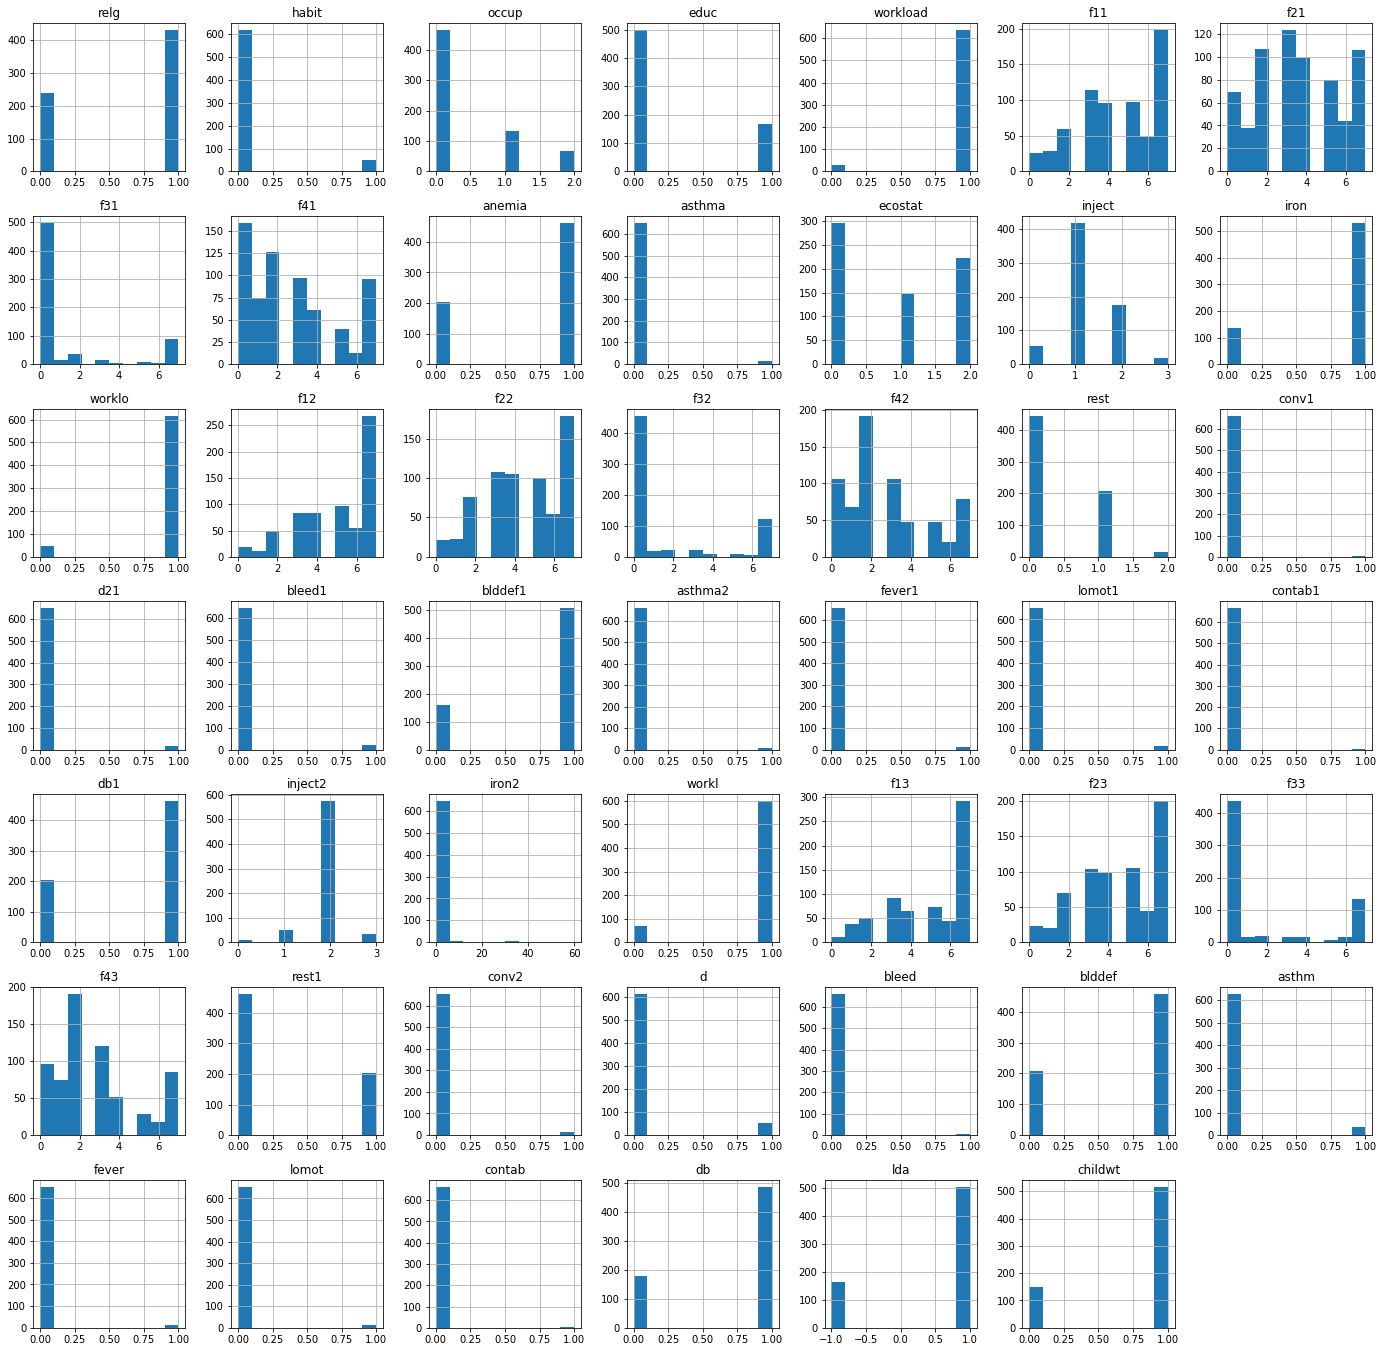

In [132]:
categorical_cols.hist(figsize=(24, 24))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



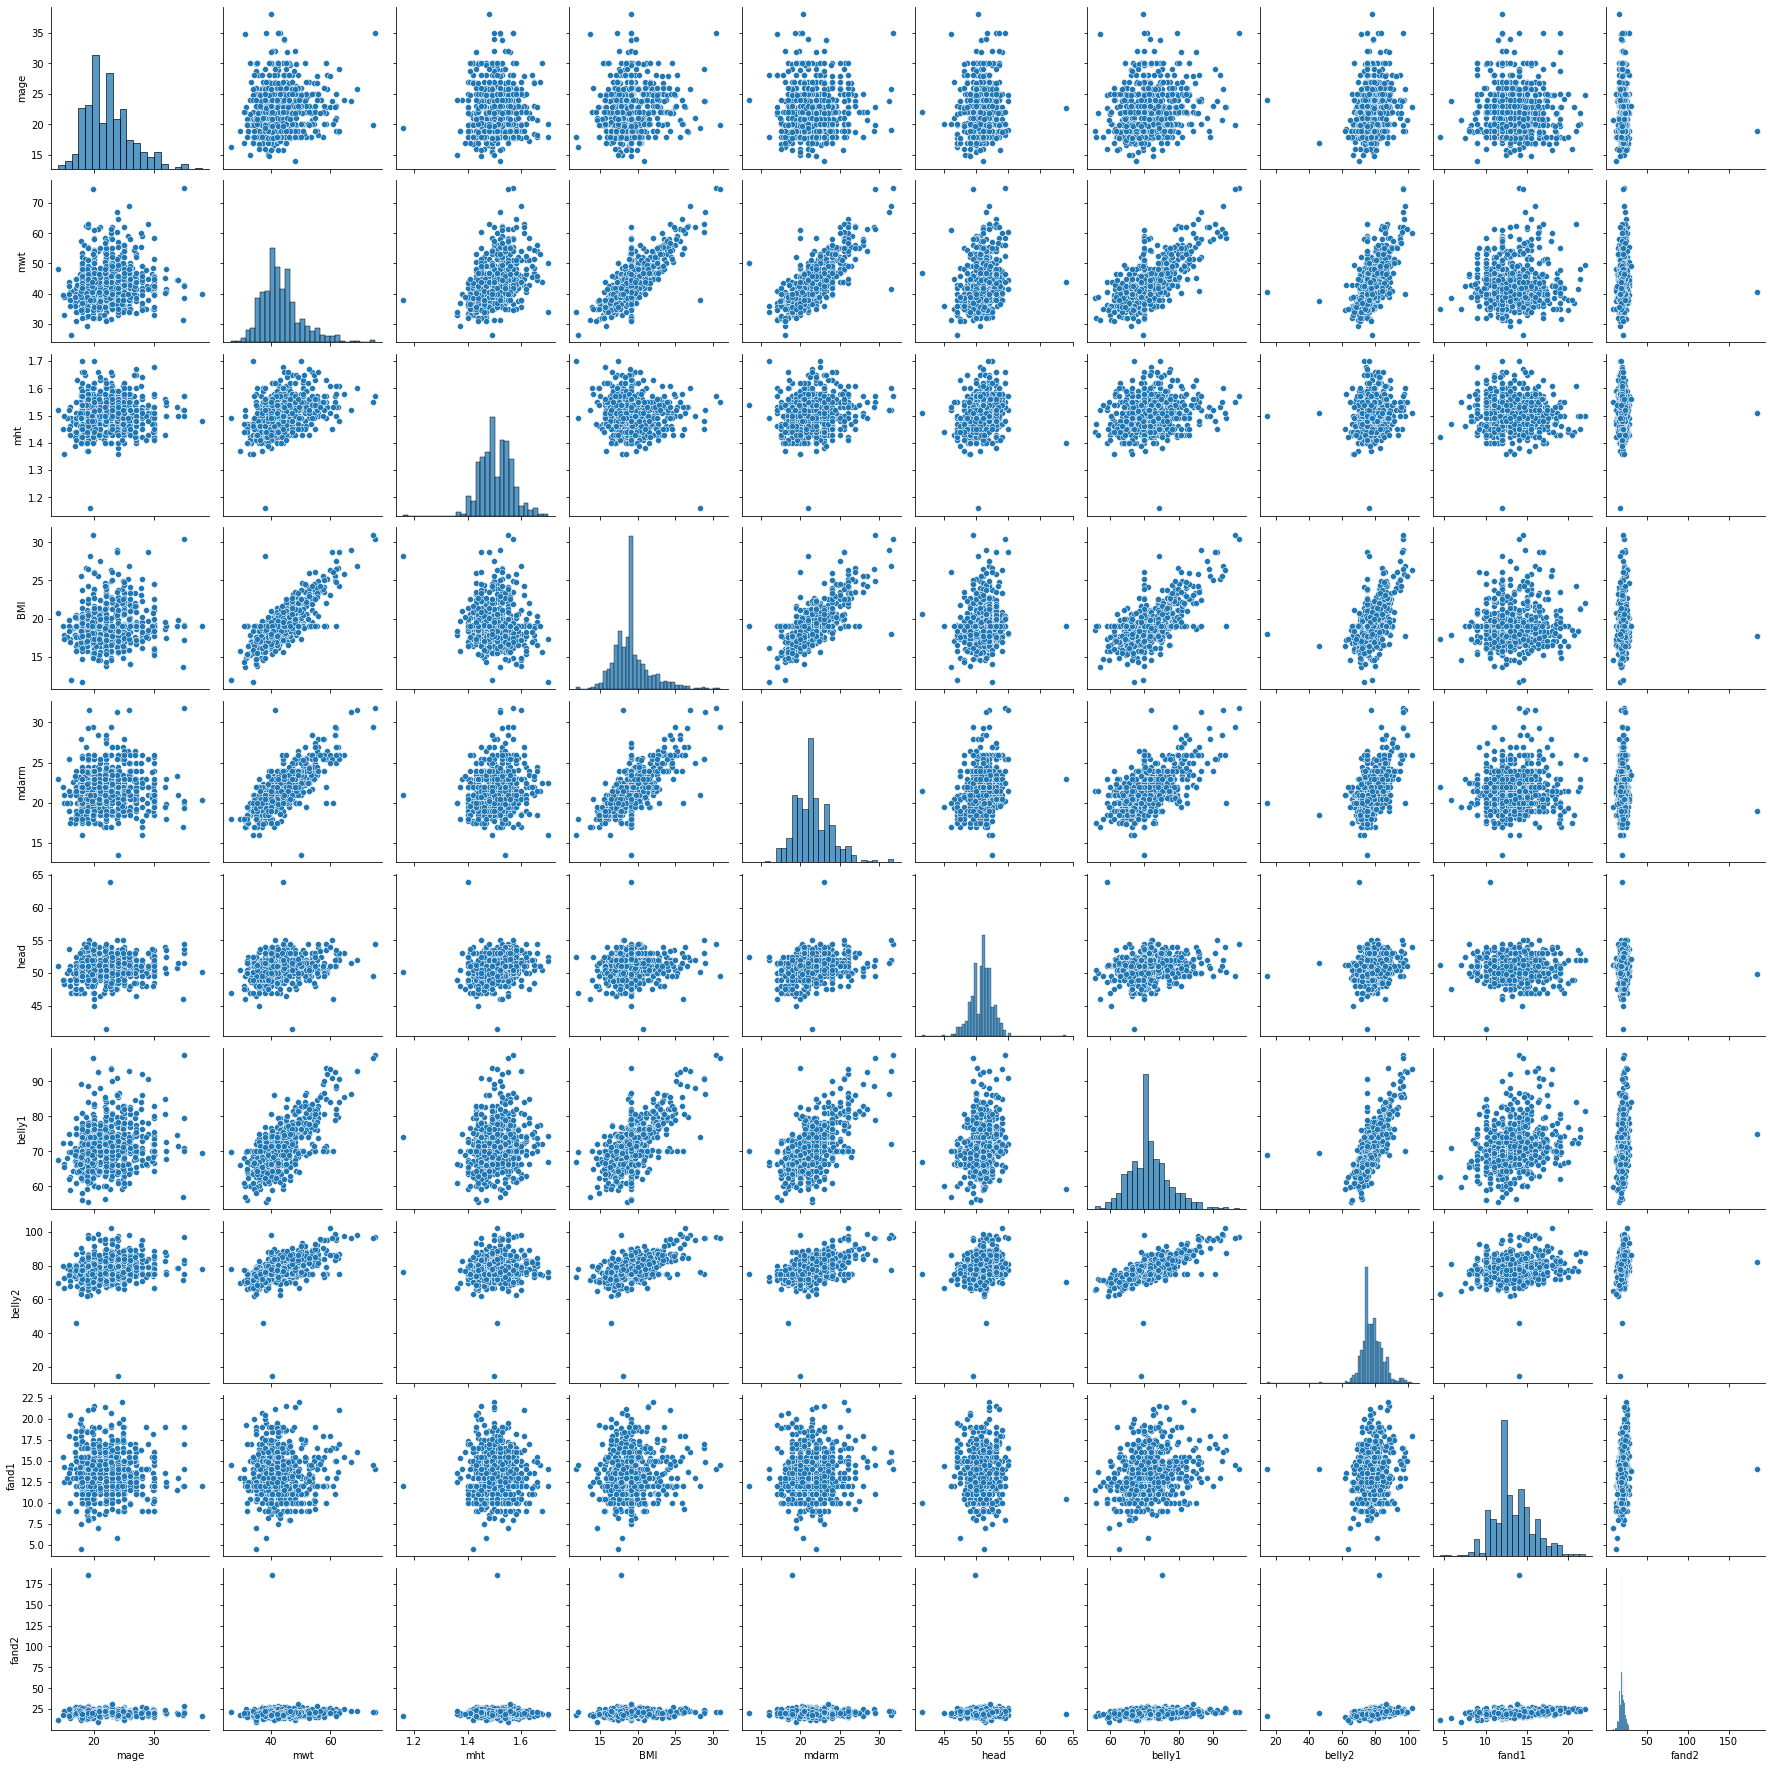

In [133]:
#correlation plotting of Physical Measurement: 
Physical_col=['mage', 'mwt', 'mht','BMI','mdarm','head','belly1','belly2','fand1','fand2']
sns.pairplot(data[Physical_col], size=2.5);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



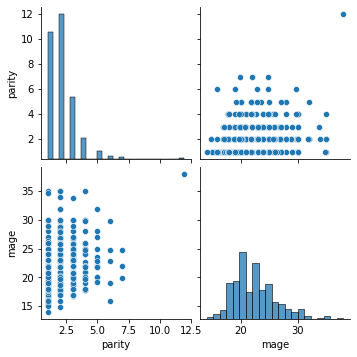

In [134]:
#Information on current pregnancy
Physical_col=['parity','mage']
sns.pairplot(data[Physical_col], size=2.5);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



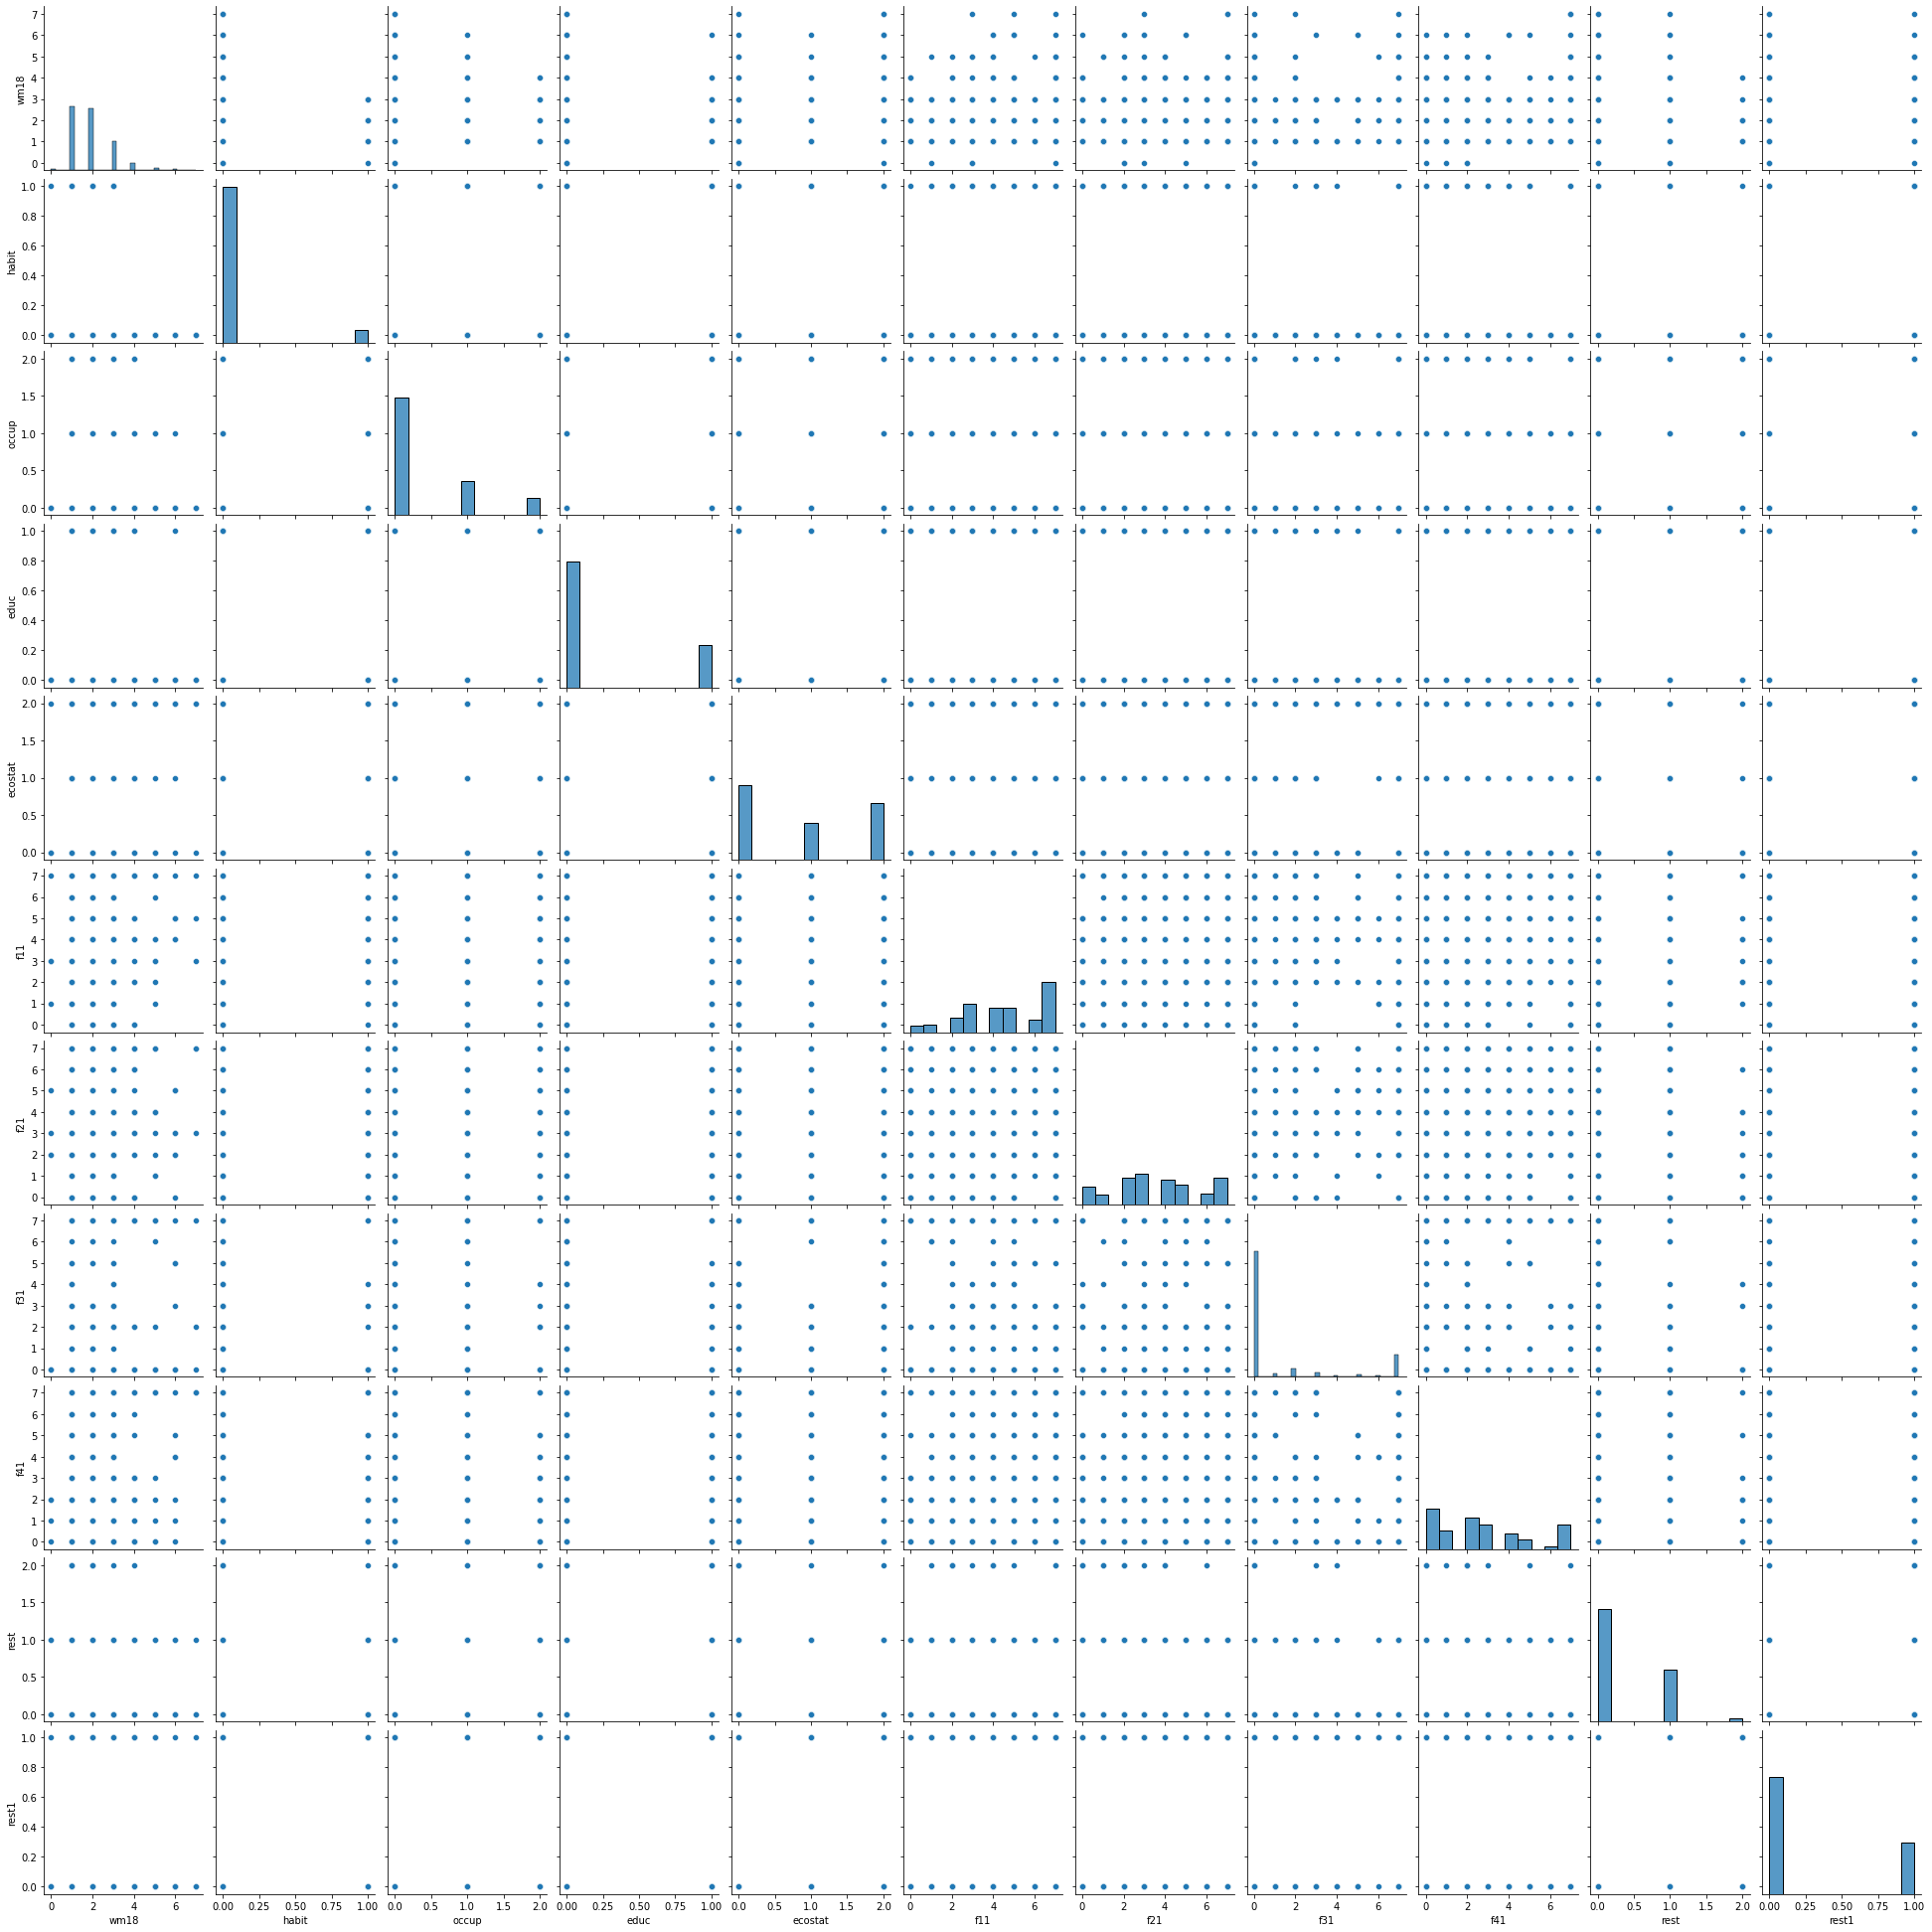

In [135]:
#Socio – economic factors and Habits:
socio_economic=['wm18', 'habit','occup','educ','ecostat','f11','f21','f31','f41','rest','rest1']
sns.pairplot(data[socio_economic], size=2.5);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



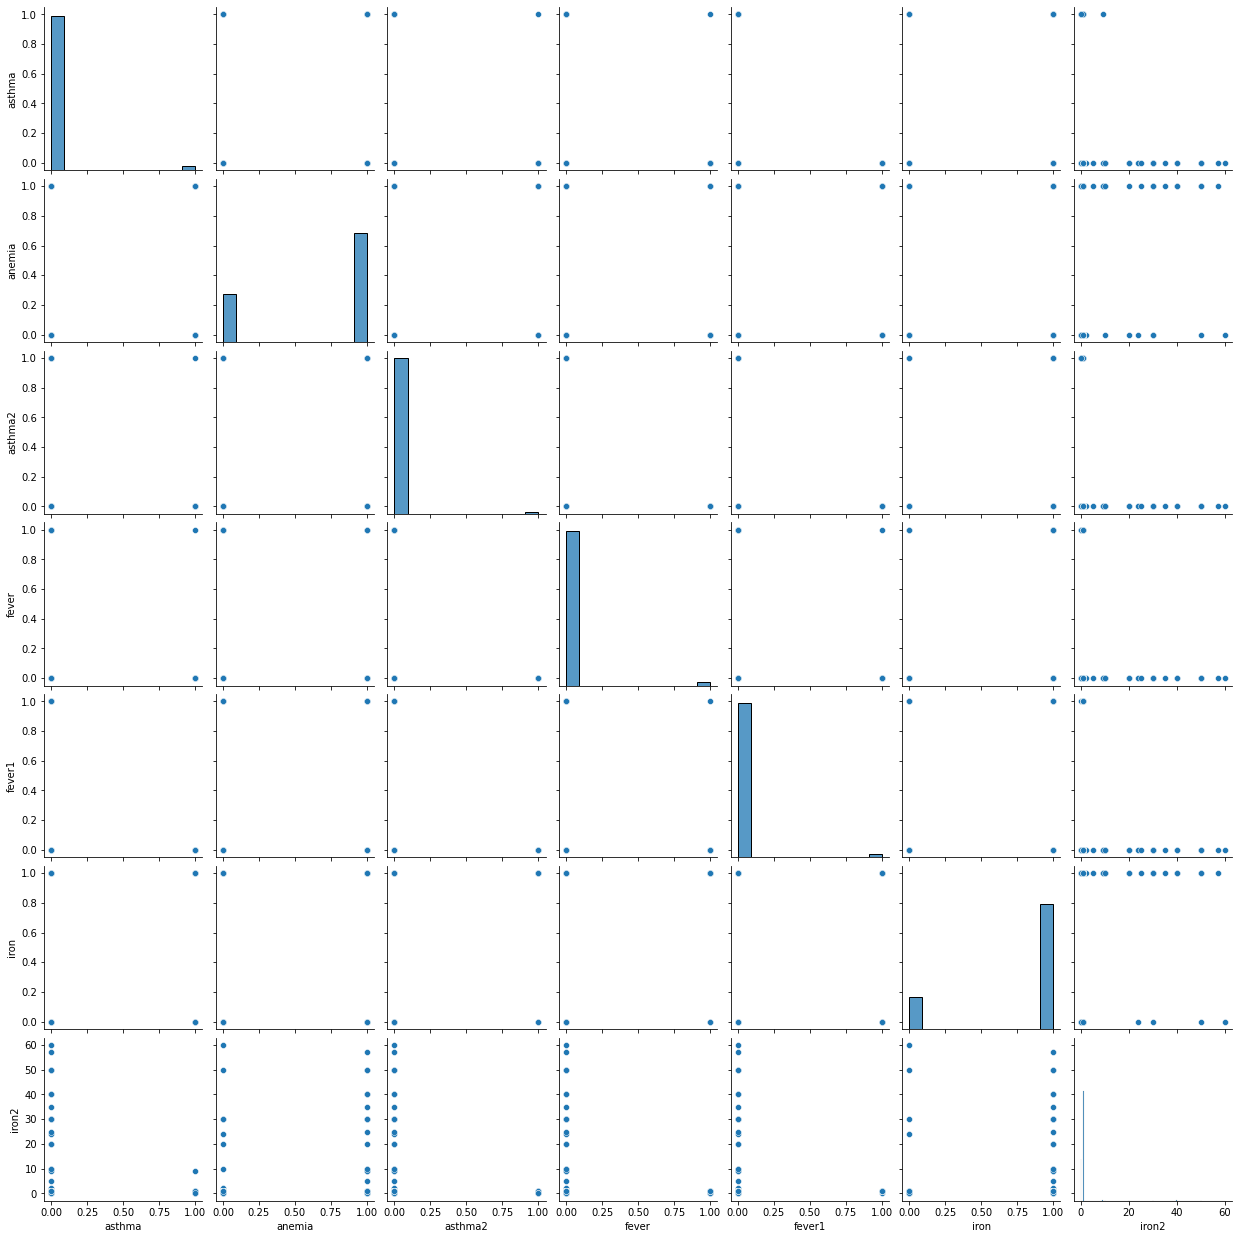

In [136]:
#Current Illness

current_ilness=['asthma','anemia','asthma2','fever','fever1','iron','iron2']
sns.pairplot(data[current_ilness], size=2.5);
plt.show()

In [137]:
categorical_cols['f11'].value_counts()

7.0    198
3.0    114
5.0     97
4.0     96
2.0     59
6.0     48
1.0     28
0.0     26
Name: f11, dtype: int64

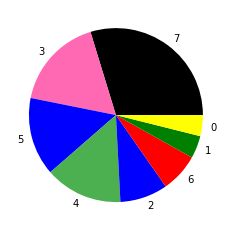

In [138]:
y = categorical_cols['f11'].value_counts()
mylabels = [7,3,5,4,2,6,1,0]
mycolors = ["black", "hotpink", "b", "#4CAF50","blue","red","green","yellow"]

plt.pie(y, labels = mylabels, colors = mycolors)
plt.show() 

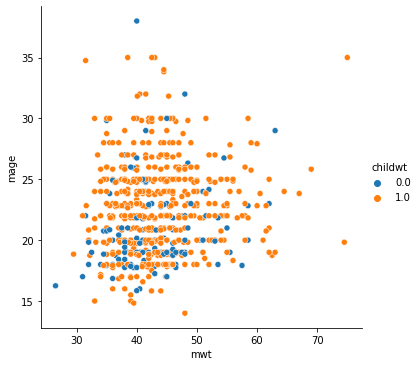

In [139]:
#relplot
sns.relplot(x='mwt',y='mage',hue='childwt',data=data)

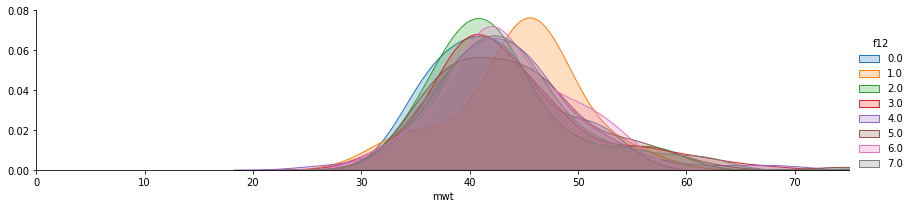

In [140]:
facet=sns.FacetGrid(data,hue='f12',aspect=4)
facet.map(sns.kdeplot,'mwt',shade=True)
facet.set(xlim=(0,data['mwt'].max()))
facet.add_legend()
plt.show()

***showing different criteria's relation with Childwt ***

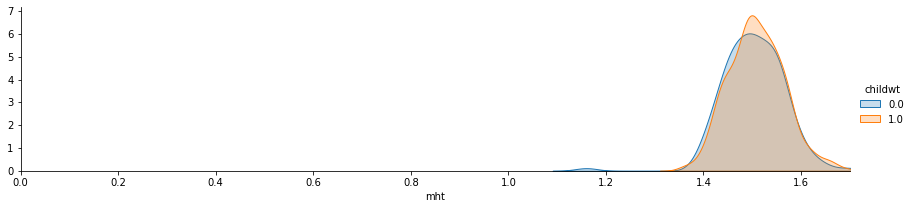

In [141]:
facet=sns.FacetGrid(data,hue='childwt',aspect=4)
facet.map(sns.kdeplot,'mht',shade=True)
facet.set(xlim=(0,data['mht'].max()))
facet.add_legend()
plt.show()

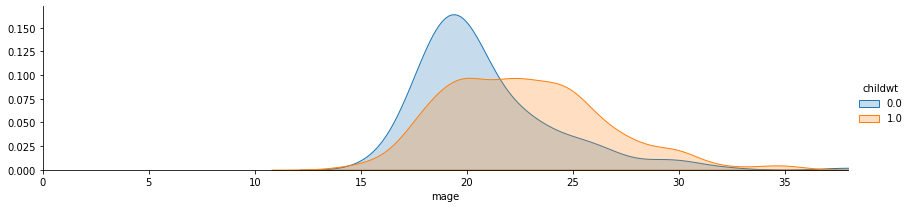

In [142]:
facet=sns.FacetGrid(data,hue='childwt',aspect=4)
facet.map(sns.kdeplot,'mage',shade=True)
facet.set(xlim=(0,data['mage'].max()))
facet.add_legend()
plt.show()

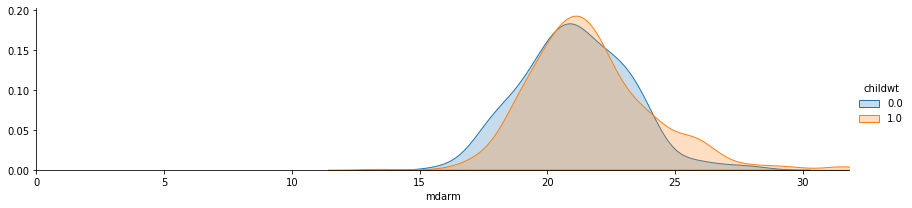

In [143]:
facet=sns.FacetGrid(data,hue='childwt',aspect=4)
facet.map(sns.kdeplot,'mdarm',shade=True)
facet.set(xlim=(0,data['mdarm'].max()))
facet.add_legend()
plt.show()

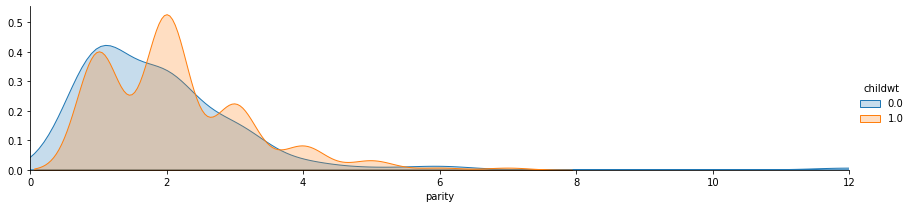

In [144]:
facet=sns.FacetGrid(data,hue='childwt',aspect=4)
facet.map(sns.kdeplot,'parity',shade=True)
facet.set(xlim=(0,data['parity'].max()))
facet.add_legend()
plt.show()

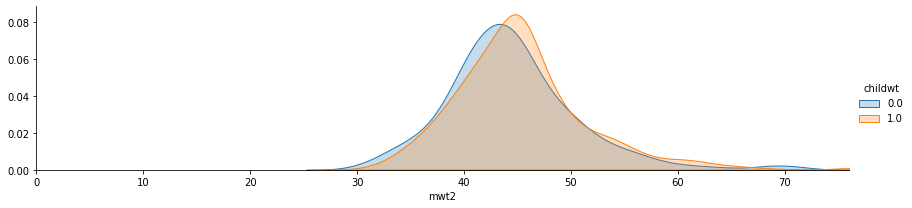

In [145]:
facet=sns.FacetGrid(data,hue='childwt',aspect=4)
facet.map(sns.kdeplot,'mwt2',shade=True)
facet.set(xlim=(0,data['mwt2'].max()))
facet.add_legend()
plt.show()

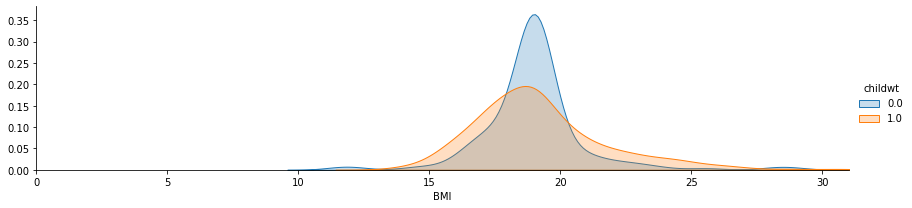

In [146]:
facet=sns.FacetGrid(data,hue='childwt',aspect=4)
facet.map(sns.kdeplot,'BMI',shade=True)
facet.set(xlim=(0,data['BMI'].max()))
facet.add_legend()
plt.show()

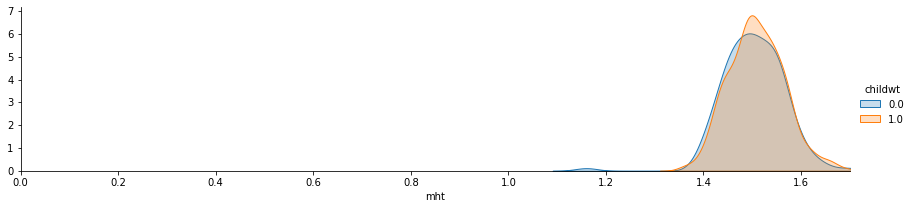

In [147]:
facet=sns.FacetGrid(data,hue='childwt',aspect=4)
facet.map(sns.kdeplot,'mht',shade=True)
facet.set(xlim=(0,data['mht'].max()))
facet.add_legend()
plt.show()

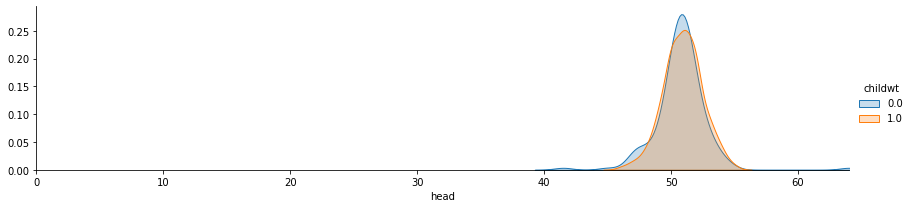

In [148]:
facet=sns.FacetGrid(data,hue='childwt',aspect=4)
facet.map(sns.kdeplot,'head',shade=True)
facet.set(xlim=(0,data['head'].max()))
facet.add_legend()
plt.show()

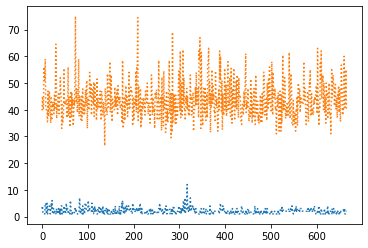

In [149]:
ypoints = data[['parity','mwt']]
plt.plot(ypoints, linestyle = 'dotted')
plt.show()

#Difining X(Independent variable) and y(dependent variable)

In [150]:
X=data.iloc[:,0:-1]
y=data['childwt']

In [151]:
X #independent data columns

parity   mage    mwt   mht  mdarm  ...  contab   db    wg2        BMI  lda
0       3.0  26.83  39.75  1.50   20.0  ...     0.0  0.0   6.35  17.666667  1.0
1       4.0  17.92  45.00  1.52   22.0  ...     0.0  1.0 -45.00  19.477147  1.0
2       1.0  35.00  43.00  1.50   20.0  ...     0.0  0.0   4.50  19.111111  1.0
3       1.0  26.00  40.00  1.48   21.0  ...     0.0  1.0   7.00  18.261505  1.0
4       1.0  25.00  56.00  1.51   28.0  ...     0.0  1.0   3.50  24.560326  1.0
..      ...    ...    ...   ...    ...  ...     ...  ...    ...        ...  ...
661     3.0  20.83  46.50  1.56   20.5  ...     0.0  1.0   3.50  19.107495  1.0
662     1.0  17.83  40.90  1.49   22.0  ...     0.0  0.0   4.60  18.422594  1.0
663     1.0  18.00  42.00  1.54   22.0  ...     0.0  1.0   5.50  17.709563  1.0
664     2.0  23.00  55.00  1.45   27.0  ...     0.0  1.0  -0.50  26.159334  1.0
665     2.0  25.75  40.00  1.49   21.5  ...     0.0  0.0   3.50  18.017206  1.0

[666 rows x 68 columns]

In [152]:
y #dependent data columns

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
661    1.0
662    1.0
663    1.0
664    1.0
665    1.0
Name: childwt, Length: 666, dtype: float64

# Feature Engineering

# min max scaler

In [153]:
columns=X.columns
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X),columns=columns)
df_minmax.head()

parity      mage       mwt       mht  ...   db       wg2       BMI  lda
0  0.181818  0.534583  0.273196  0.629630  ...  0.0  0.792571  0.306680  1.0
1  0.272727  0.163333  0.381443  0.666667  ...  1.0  0.205714  0.400757  1.0
2  0.000000  0.875000  0.340206  0.629630  ...  0.0  0.771429  0.381737  1.0
3  0.000000  0.500000  0.278351  0.592593  ...  1.0  0.800000  0.337590  1.0
4  0.000000  0.458333  0.608247  0.648148  ...  1.0  0.760000  0.664892  1.0

[5 rows x 68 columns]

# PCA(Principal Component analysis)

In [154]:
np.mean(X),np.std(X)

(parity     2.066066
 mage      22.293288
 mwt       43.522598
 mht        1.506970
 mdarm     21.549550
             ...    
 contab     0.003003
 db         0.729730
 wg2       -0.479880
 BMI       19.145855
 lda        0.513514
 Length: 68, dtype: float64, parity     1.142342
 mage       3.735523
 mwt        6.655494
 mht        0.058634
 mdarm      2.364713
             ...    
 contab     0.054717
 db         0.444099
 wg2       14.383722
 BMI        2.463049
 lda        0.858082
 Length: 68, dtype: float64)

In [155]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principal_data = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
principal_data.tail()

principal component 1  ...  principal component 5
661             -45.738153  ...              12.484003
662             -55.033716  ...              -1.943663
663              19.758798  ...               6.950067
664              44.796126  ...              22.370537
665             -30.741692  ...              -4.334544

[5 rows x 5 columns]

In [156]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.49836288 0.14824924 0.12701515 0.05722855 0.05028131]


#Feature score

In [157]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(df_minmax,y)

In [158]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']

In [159]:
features_rank.nsmallest(10,'Score')

Features     Score
23     dis1  0.000400
65      wg2  0.001195
24   inject  0.004091
61    fever  0.007181
47  inject2  0.007719
25    falif  0.008242
14      f41  0.011182
5      head  0.015367
22     sis1  0.017436
3       mht  0.023164

In [160]:
features_rank.nlargest(10,'Score')

Features       Score
67      lda  145.253385
55    rest1   10.887007
32     rest    8.013230
33    conv1    6.379097
37  asthma2    5.706243
7     habit    5.696411
35   bleed1    5.074031
9      educ    3.840539
40  contab1    3.469799
49    iron2    2.325178

From feature scoring I can find out the score of the features and find out the least scored feature

#correlation

In [161]:
data.corr() # Correlation of all data

parity      mage       mwt  ...       BMI       lda   childwt
parity   1.000000  0.256340  0.027067  ...  0.009385  0.090997  0.081512
mage     0.256340  1.000000  0.096085  ...  0.092134  0.206806  0.199906
mwt      0.027067  0.096085  1.000000  ...  0.795557  0.056138  0.055471
mht     -0.003109  0.054323  0.411801  ... -0.098457  0.056054  0.043538
mdarm   -0.025724  0.049781  0.765347  ...  0.706819  0.094609  0.101753
...           ...       ...       ...  ...       ...       ...       ...
db       0.029277  0.010392  0.097748  ...  0.097897 -0.092861 -0.083323
wg2     -0.103242 -0.154521 -0.083865  ... -0.114787 -0.008453  0.006888
BMI      0.009385  0.092134  0.795557  ...  1.000000  0.035874  0.042670
lda      0.090997  0.206806  0.056138  ...  0.035874  1.000000  0.946903
childwt  0.081512  0.199906  0.055471  ...  0.042670  0.946903  1.000000

[69 rows x 69 columns]

In [162]:
X.corr() # correlation of independent variables

parity      mage       mwt  ...       wg2       BMI       lda
parity  1.000000  0.256340  0.027067  ... -0.103242  0.009385  0.090997
mage    0.256340  1.000000  0.096085  ... -0.154521  0.092134  0.206806
mwt     0.027067  0.096085  1.000000  ... -0.083865  0.795557  0.056138
mht    -0.003109  0.054323  0.411801  ...  0.005392 -0.098457  0.056054
mdarm  -0.025724  0.049781  0.765347  ...  0.003728  0.706819  0.094609
...          ...       ...       ...  ...       ...       ...       ...
contab -0.027196  0.022724  0.076090  ...  0.022817  0.062637  0.031115
db      0.029277  0.010392  0.097748  ... -0.190215  0.097897 -0.092861
wg2    -0.103242 -0.154521 -0.083865  ...  1.000000 -0.114787 -0.008453
BMI     0.009385  0.092134  0.795557  ... -0.114787  1.000000  0.035874
lda     0.090997  0.206806  0.056138  ... -0.008453  0.035874  1.000000

[68 rows x 68 columns]

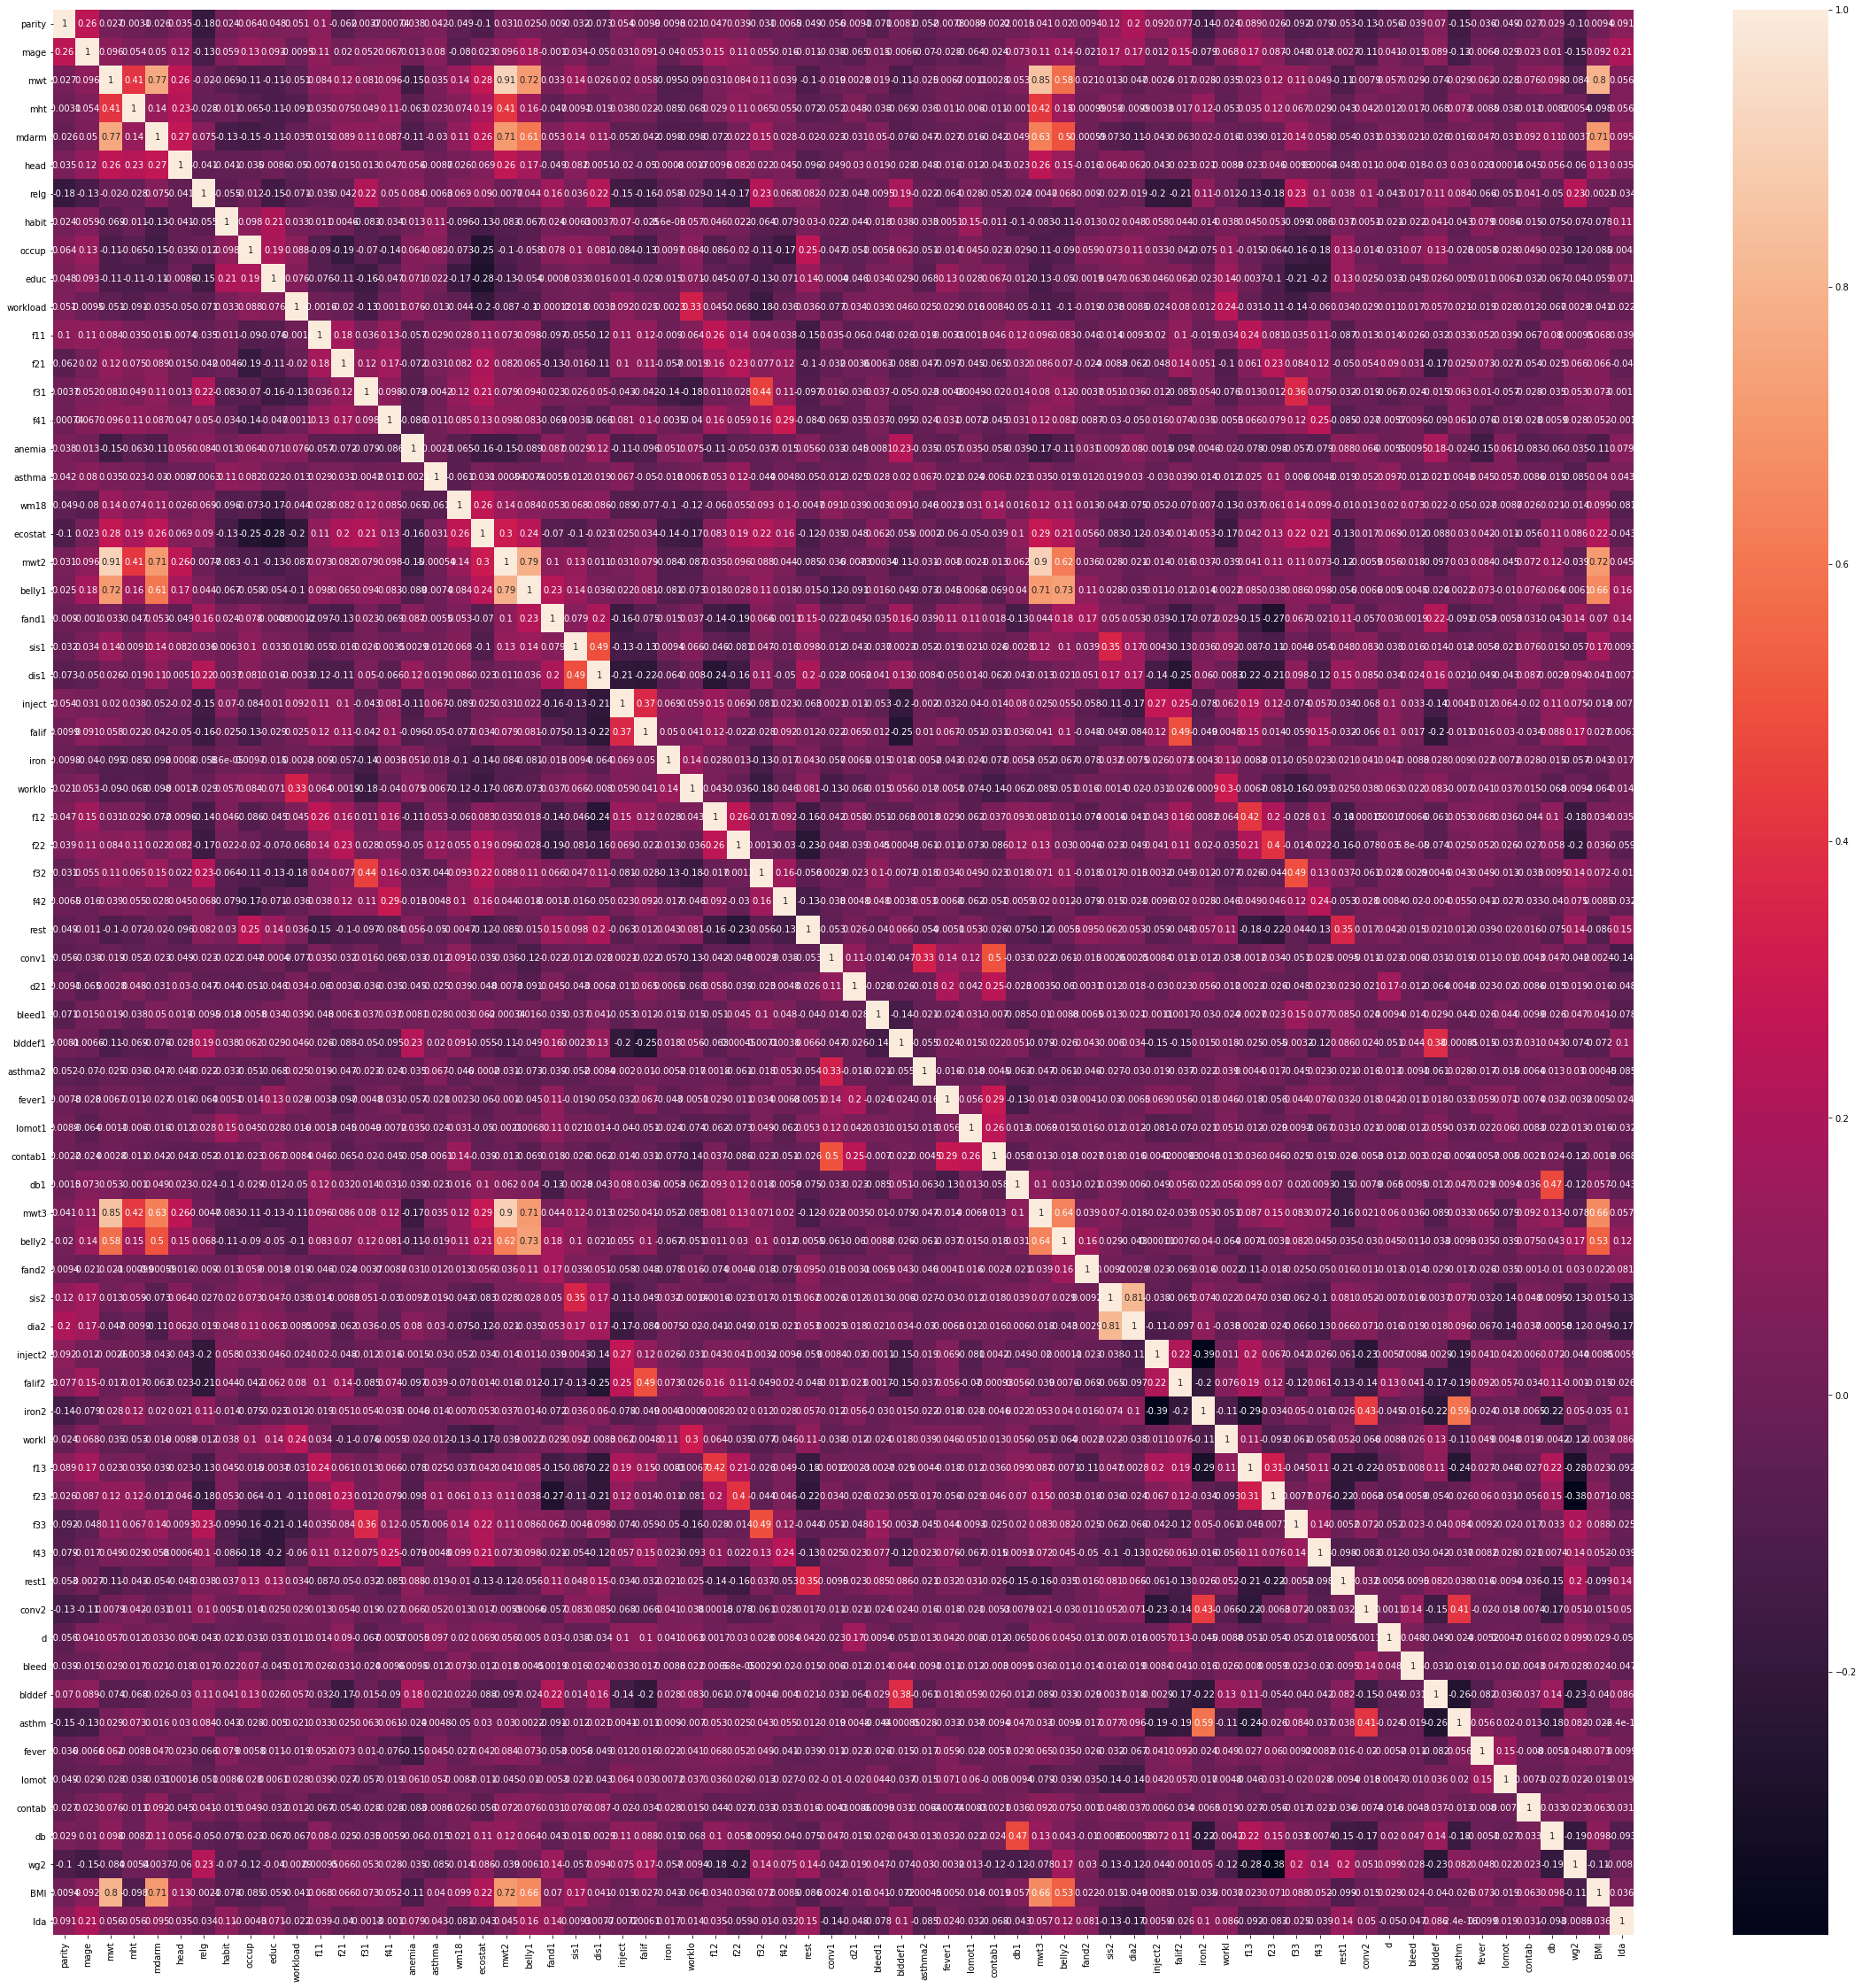

In [163]:
#plotting correlation by heat mapping
corr=X.corr()
top_features=corr.index
plt.figure(figsize=(40,40))
sns.heatmap(data[top_features].corr(),annot=True)

In [164]:
threshold=0.5
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(X,threshold)

{'BMI', 'asthm', 'belly1', 'belly2', 'dia2', 'mdarm', 'mwt2', 'mwt3'}

#Feture Importance

In [165]:
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [166]:
print(model.feature_importances_)

[9.63618052e-03 1.35151394e-02 5.67914002e-03 6.30386755e-03
 7.03954201e-03 8.93825982e-03 4.24132685e-03 4.54381116e-03
 7.42169498e-03 5.90980847e-03 1.43493093e-03 6.39626384e-03
 5.53220142e-03 5.05437029e-03 6.09815326e-03 4.94730649e-03
 9.47174271e-04 6.48582860e-03 5.21131519e-03 5.82062680e-03
 1.26243495e-02 1.04007170e-02 5.62543294e-03 6.84407901e-03
 4.77156266e-03 7.31148458e-03 3.46512569e-03 1.80785572e-03
 6.09510370e-03 5.84902490e-03 4.54017759e-03 5.91789369e-03
 1.16831290e-02 3.04661298e-03 1.77554202e-03 3.98432667e-03
 6.51995764e-03 2.61247420e-03 5.80973793e-04 2.81145631e-03
 3.19089824e-04 4.19008816e-03 6.67288088e-03 8.45305552e-03
 7.42642264e-03 8.30095827e-03 1.65724988e-02 5.27459579e-03
 6.99534125e-03 7.25426084e-03 4.37724594e-03 8.02076481e-03
 6.58927813e-03 6.25377062e-03 6.15429069e-03 1.19273476e-02
 7.09737326e-04 2.71579614e-03 1.14211596e-03 8.58454552e-03
 3.02788299e-03 1.28533909e-03 5.59580352e-04 0.00000000e+00
 4.89206594e-03 6.896330

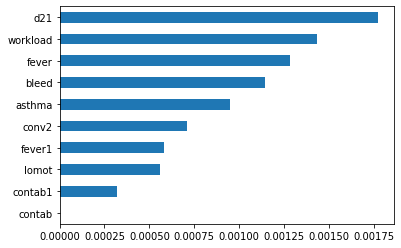

In [167]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nsmallest(10).plot(kind='barh')
plt.show()

In [168]:
ns=ranked_features.nsmallest(10)
ns

contab      0.000000
contab1     0.000319
lomot       0.000560
fever1      0.000581
conv2       0.000710
asthma      0.000947
bleed       0.001142
fever       0.001285
workload    0.001435
d21         0.001776
dtype: float64

In [169]:
nl=ranked_features.nlargest(10)
nl

lda       0.610904
dia2      0.016572
BMI       0.015077
mage      0.013515
belly1    0.012624
rest1     0.011927
rest      0.011683
fand1     0.010401
parity    0.009636
head      0.008938
dtype: float64

#Wrapper Method:Backward Elimination

In [170]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const      7.590647e-01
parity     3.554962e-01
mage       5.223802e-01
mwt        4.429530e-01
mht        9.394234e-01
              ...      
contab     8.960625e-01
db         4.161580e-01
wg2        5.974220e-01
BMI        7.279767e-01
lda       3.754126e-270
Length: 69, dtype: float64

In [171]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                childwt   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     89.44
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          1.39e-269
Time:                        13:03:43   Log-Likelihood:                 442.05
No. Observations:                 666   AIC:                            -746.1
Df Residuals:                     597   BIC:                            -435.5
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0976      0.318      0.307      0.759      -0.527       0.722
parity         0.0047      0.005      0.925      0.355      -0.005       0.015
mage           0.0010      0.002      0.640      0.522      -0.002       0.004
mwt           -0.0023      0.003     -0.768      0.443      -0.008       0.004
mht           -0.0127      0.166     -0.076      0.939      -0.340       0.314
mdarm          0.0023      0.004      0.570      0.569      -0.006       0.010
head           0.0031      0.003      0.914      0.361      -0.004       0.010
relg           0.0181      0.013      1.410      0.159      -0.007       0.043
habit      -1.152e-05      0.021     -0.001      1.000      -0.042       0.042
occup          0.0137      0.009      1.529      0.127      -0.004       0.031
educ           0.0167      0.014      1.223      0.222      -0.010       0.044
workload      -0.0123      0.028     -0.432      0.666      -0.068       0.044
f11           -0.0013      0.003     -0.479      0.632      -0.007       0.004
f21            0.0016      0.003      0.594      0.553      -0.004       0.007
f31           -0.0013      0.002     -0.514      0.607      -0.006       0.004
f41           -0.0024      0.002     -0.961      0.337      -0.007       0.002
anemia        -0.0046      0.012     -0.375      0.708      -0.029       0.020
asthma         0.0183      0.036      0.515      0.607      -0.051       0.088
wm18           0.0020      0.005      0.376      0.707      -0.008       0.013
ecostat       -0.0033      0.007     -0.446      0.656      -0.018       0.011
mwt2           0.0051      0.003      1.753      0.080      -0.001       0.011
belly1        -0.0003      0.002     -0.151      0.880      -0.004       0.003
fand1          0.0054      0.002      2.175      0.030       0.001       0.010
sis1       -3.102e-05      0.001     -0.044      0.965      -0.001       0.001
dis1          -0.0009      0.001     -1.288      0.198      -0.002       0.000
inject        -0.0105      0.010     -1.065      0.287      -0.030       0.009
falif         -0.0001      0.000     -0.484      0.628      -0.001       0.000
iron           0.0251      0.014      1.846      0.065      -0.002       0.052
worklo         0.0168      0.023      0.731      0.465      -0.028       0.062
f12            0.0007      0.003      0.216      0.829      -0.006       0.007
f22            0.0006      0.003      0.200      0.841      -0.005       0.007
f32           -0.0005      0.002     -0.216      0.829      -0.005       0.004
f42            0.0040      0.003      1.502      0.134      -0.001       0.009
rest           0.0207      0.012      1.755      0.080      -0.002       0.044
conv1          0.3479      0.086      4.057      0.000       0.179       0.516
d21           -0.0312      0.037     -0.844      0.399      -0.104       0.041
bl

In [172]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['fand1', 'dis1', 'rest', 'conv1', 'asthma2', 'contab1', 'sis2', 'dia2', 'asthm', 'lda']


# Multicoliniarity removing with VIF

In [173]:
def cal_vif(X):
  vif=pd.DataFrame()
  vif["variables"]=X.columns
  vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
  return(vif)

vf=cal_vif(X)

In [174]:
vf.sort_values(
   by="VIF",
   key=lambda x: np.argsort(index_natsorted(vf["VIF"]))
)

variables         VIF
63    contab    1.083360
58     bleed    1.088828
62     lomot    1.145461
16    asthma    1.165602
61     fever    1.182945
..       ...         ...
2        mwt  465.295918
20    belly1  618.750578
19      mwt2  666.075396
3        mht  895.798986
5       head  912.940068

[68 rows x 2 columns]

feature score(lowest feature score)<br>
dis1, wg2,inject,fever,inject2<br>

From correlation analysis correlated columns are(correlation is greater than 0.5):<br>
'BMI', 'asthm', 'belly1', 'belly2', 'dia2', 'mdarm', 'mwt2', 'mwt3'<br>

Feature Importance:<br>
(lowest important feature):contab,conv2, contab1, fever1,lomot<br>
(Highest important feature):lda,dia2,mage,BMI,belly1,rest,rest1
fand1<br>

VIF:<br>
head,mht,mwt2,belly1,mwt<br>

With backword eliminition process from the p value of the columns find out the best features:<br>
'fand1', 'dis1', 'rest', 'conv1', 'asthma2', 'contab1', 'sis2', 'dia2', 'asthm', 'lda'<br>
lda,dia2,mage,BMI,belly1,rest,rest1
fand1




So we can remove the unimportant features by analysisng the result of all those process.<br>
'BMI', 'belly2', 'mdarm', 'mwt2', 'mwt3','contab','conv2', 'fever1','lomot','head'

In [175]:
new_x=X.drop(columns=['BMI', 'belly2', 'mdarm', 'mwt2', 'mwt3','contab','conv2', 'fever1','lomot','head'])

In [176]:
new_x

parity   mage    mwt   mht  relg  ...  asthm  fever   db    wg2  lda
0       3.0  26.83  39.75  1.50   1.0  ...    0.0    0.0  0.0   6.35  1.0
1       4.0  17.92  45.00  1.52   1.0  ...    0.0    0.0  1.0 -45.00  1.0
2       1.0  35.00  43.00  1.50   0.0  ...    0.0    0.0  0.0   4.50  1.0
3       1.0  26.00  40.00  1.48   1.0  ...    0.0    0.0  1.0   7.00  1.0
4       1.0  25.00  56.00  1.51   1.0  ...    0.0    0.0  1.0   3.50  1.0
..      ...    ...    ...   ...   ...  ...    ...    ...  ...    ...  ...
661     3.0  20.83  46.50  1.56   1.0  ...    0.0    0.0  1.0   3.50  1.0
662     1.0  17.83  40.90  1.49   1.0  ...    1.0    0.0  0.0   4.60  1.0
663     1.0  18.00  42.00  1.54   0.0  ...    0.0    1.0  1.0   5.50  1.0
664     2.0  23.00  55.00  1.45   0.0  ...    0.0    0.0  1.0  -0.50  1.0
665     2.0  25.75  40.00  1.49   1.0  ...    0.0    0.0  0.0   3.50  1.0

[666 rows x 58 columns]

#Standerd scaler

In [177]:
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(new_x),columns=new_x.columns)
X_scaled

parity      mage       mwt  ...        db       wg2       lda
0    0.817561  1.214478 -0.566840  ... -1.643168  0.474834  0.566947
1    1.692956 -1.170730  0.221982  ...  0.608581 -3.095174  0.566947
2   -0.933229  3.401589 -0.078521  ... -1.643168  0.346216  0.566947
3   -0.933229  0.992287 -0.529277  ...  0.608581  0.520024  0.566947
4   -0.933229  0.724587  1.874752  ...  0.608581  0.276693  0.566947
..        ...       ...       ...  ...       ...       ...       ...
661  0.817561 -0.391722  0.447360  ...  0.608581  0.276693  0.566947
662 -0.933229 -1.194823 -0.394050  ... -1.643168  0.353169  0.566947
663 -0.933229 -1.149314 -0.228773  ...  0.608581  0.415739  0.566947
664 -0.057834  0.189187  1.724501  ...  0.608581 -0.001399  0.566947
665 -0.057834  0.925362 -0.529277  ... -1.643168  0.276693  0.566947

[666 rows x 58 columns]

## Splitting Data

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [179]:
X_train.shape

(466, 58)

In [180]:
X_test.shape

(200, 58)

In [181]:
y_train.shape

(466,)

In [182]:
y_test.shape

(200,)

#Logistic regression

In [183]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("logistic regression accuracy:{0}%".format(accuracy_score(y_test,y_pred_log)* 100))

print("logistic regression R Square score:{0}%".format(r2_score(y_test,y_pred_log)* 100))

print("logistic regression mean_squared_error:{0}%".format(mean_squared_error(y_test,y_pred_log)* 100))

logistic regression accuracy:98.0%
logistic regression R Square score:88.34498834498835%
logistic regression mean_squared_error:2.0%


In [184]:
#confusion martix
cm = confusion_matrix(y_test, y_pred_log)
cm

array([[ 42,   2],
       [  2, 154]])

Text(69.0, 0.5, 'Actual')

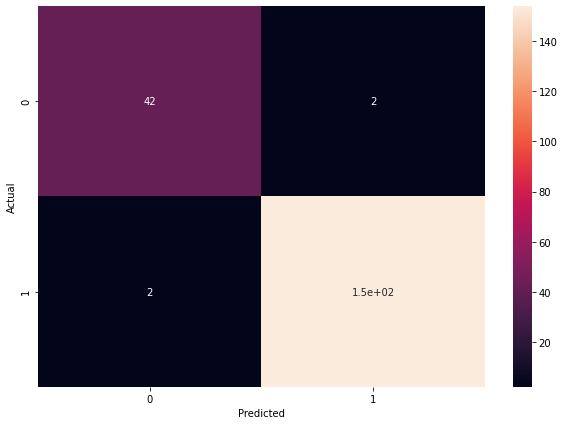

In [185]:
#plotting confusion martix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [186]:
precision = precision_score(y_test, y_pred_log, average='binary')
p=round(precision* 100, 2)
print('precission: %.2f' % p,'%')

recall = recall_score(y_test, y_pred_log, average='binary')
r=round(recall* 100, 2)
print('recall: %.2f' % r,'%')

f1 = f1_score(y_test, y_pred_log, average='binary')
f=round(f1* 100, 2)
print('f1: %.2f' % f,'%')

precission: 98.72 %
recall: 98.72 %
f1: 98.72 %


In [187]:
#classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        44
         1.0       0.99      0.99      0.99       156

    accuracy                           0.98       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200



#Support Vector Machine

In [188]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Mechine accuracy:{0}%".format(accuracy_score(y_test,y_pred_svc)* 100))

print("Support Vector Mechine R Square score:{0}%".format(r2_score(y_test,y_pred_svc)* 100))

print("Support Vector Mechine mean_squared_error:{0}%".format(mean_squared_error(y_test,y_pred_svc)* 100))

Support Vector Mechine accuracy:96.5%
Support Vector Mechine R Square score:79.60372960372962%
Support Vector Mechine mean_squared_error:3.5000000000000004%


In [189]:
#confusion martix
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[ 39,   5],
       [  2, 154]])

Text(69.0, 0.5, 'Actual')

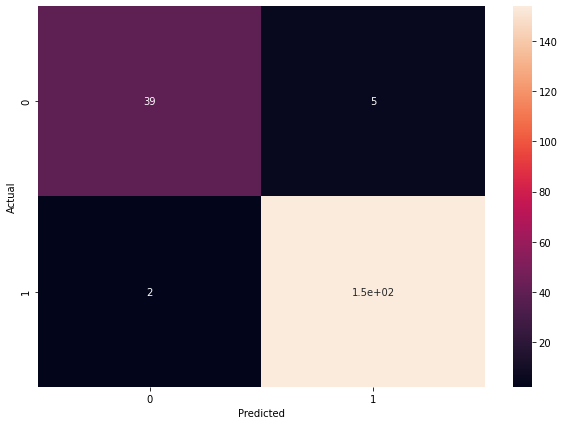

In [190]:
#plotting confusion martix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [191]:
#classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92        44
         1.0       0.97      0.99      0.98       156

    accuracy                           0.96       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.96      0.96      0.96       200



#K_neighbors

In [192]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Neighbors accuracy:{0}%".format(accuracy_score(y_test,y_pred_knn)* 100))

print("K-Neighbors R Square score:{0}%".format(r2_score(y_test,y_pred_knn)* 100))

print("K-Neighbors mean_squared_error:{0}%".format(mean_squared_error(y_test,y_pred_knn)* 100))

K-Neighbors accuracy:87.0%
K-Neighbors R Square score:24.242424242424253%
K-Neighbors mean_squared_error:13.0%


In [193]:
#confusion martix
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[ 20,  24],
       [  2, 154]])

Text(69.0, 0.5, 'Actual')

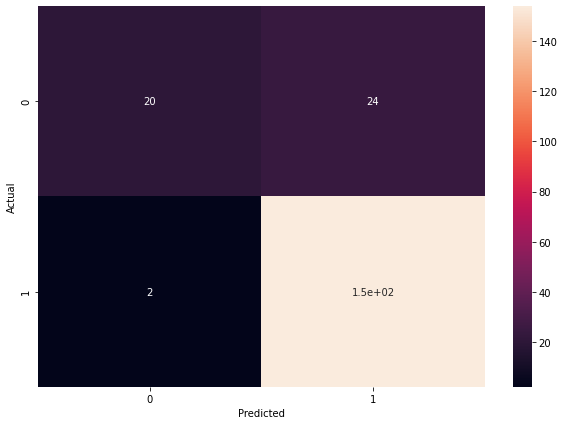

In [194]:
#plotting confusion martix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [195]:
#classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        44
         1.0       0.87      0.99      0.92       156

    accuracy                           0.87       200
   macro avg       0.89      0.72      0.76       200
weighted avg       0.87      0.87      0.85       200



# Gaussian Naive Bayes

In [196]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gnb = gaussian.predict(X_test)

print("Gaussian Naive bayes accuracy:{0}%".format(accuracy_score(y_test,y_pred_gnb)* 100))

print("Gaussian Naive bayes R Square score:{0}%".format(r2_score(y_test,y_pred_gnb)* 100))

print("Gaussian Naive bayes mean_squared_error:{0}%".format(mean_squared_error(y_test,y_pred_gnb)* 100))

Gaussian Naive bayes accuracy:96.5%
Gaussian Naive bayes R Square score:79.60372960372962%
Gaussian Naive bayes mean_squared_error:3.5000000000000004%


In [197]:
#confusion martix
cm = confusion_matrix(y_test, y_pred_gnb)
cm

array([[ 40,   4],
       [  3, 153]])

Text(69.0, 0.5, 'Actual')

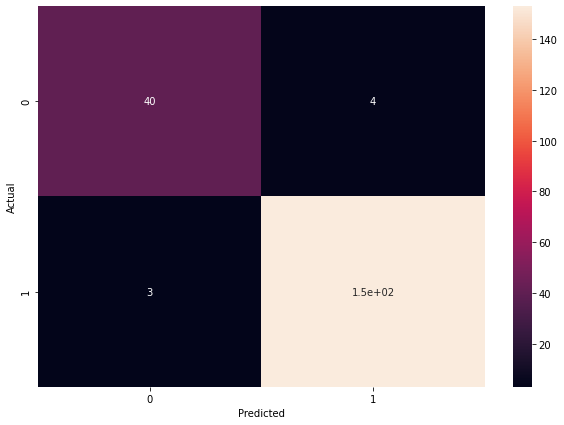

In [198]:
#plotting confusion martix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [199]:
#classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        44
         1.0       0.97      0.98      0.98       156

    accuracy                           0.96       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.96      0.96      0.96       200



#ROC Curve

In [200]:
#Computing AUROC and ROC curve values

logistic_auc = roc_auc_score(y_test, y_pred_log)
svc_auc = roc_auc_score(y_test, y_pred_svc)
knn_auc = roc_auc_score(y_test, y_pred_knn)
gnb_auc = roc_auc_score(y_test, y_pred_gnb)

#Print AUROC scores
print('Logistic regression: AUROC = %.3f' % (logistic_auc))
print('Support vector mechine: AUROC = %.3f' % (svc_auc))
print('K-Neighbours: AUROC = %.3f' % (knn_auc))
print('Gaussian Naive Bayes: AUROC = %.3f' % (gnb_auc))

Logistic regression: AUROC = 0.971
Support vector mechine: AUROC = 0.937
K-Neighbours: AUROC = 0.721
Gaussian Naive Bayes: AUROC = 0.945


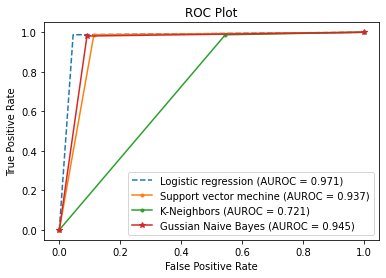

In [201]:
#Calculate ROC curve
log_fpr, log_tpr, _ = roc_curve(y_test, y_pred_log)
svc_fpr, svc_tpr, _ = roc_curve(y_test, y_pred_svc)
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_pred_gnb)

#plot Plot the ROC curve
plt.plot(log_fpr, log_tpr, linestyle='--', label='Logistic regression (AUROC = %0.3f)' % logistic_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support vector mechine (AUROC = %0.3f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='*', label='Gussian Naive Bayes (AUROC = %0.3f)' % gnb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

#logistic regression by cross validation

In [202]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [203]:
#Logistic regression
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)
clf_LR.fit(X_scaled, y)
scoring = 'accuracy'
score = cross_val_score(clf_LR, X_scaled, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("Average Score:",round(np.mean(score)*100,4))

[0.96268657 0.96992481 0.9924812  0.96992481 0.98496241]
Average Score: 97.5996
